# Features visualization

## Booking

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv("../../data/original/dataset/data_booking.csv")
keys = pl.read_csv("../../data/processed/key_words_data_booking.csv")

df_joined = df.join(keys, on="id", how="inner")

# Récupérer toutes les catégories uniques
categories = df_joined["category"].unique().to_list()


### Guest type

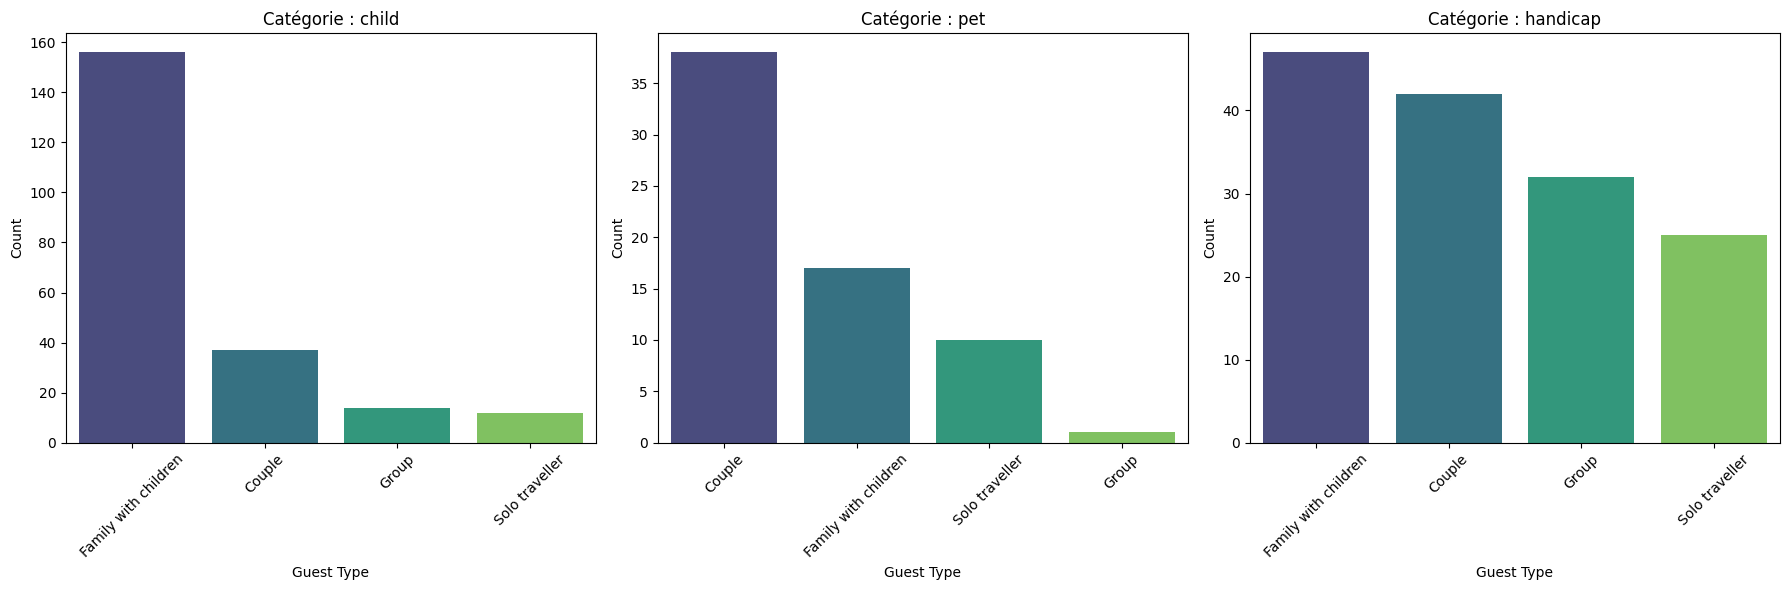

In [ ]:
# Préparer figure
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))

# Palette variable
for ax, cat in zip(axes, categories):

    # Filtre par catégorie
    df_cat = df_joined.filter(pl.col("category") == cat)

    # Comptage guest_type
    counts = (
        df_cat
        .group_by("guest_type")
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
    )

    types = counts["guest_type"].to_list()
    values = counts["count"].to_list()

    # Palette
    palette = sns.color_palette("viridis", n_colors=len(types))

    # Barplot avec hue obligatoire (Seaborn 0.14+)
    sns.barplot(
        x=types,
        y=values,
        hue=types,
        palette=palette,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Category : {cat}")
    ax.set_xlabel("Guest Type")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Accommodation type

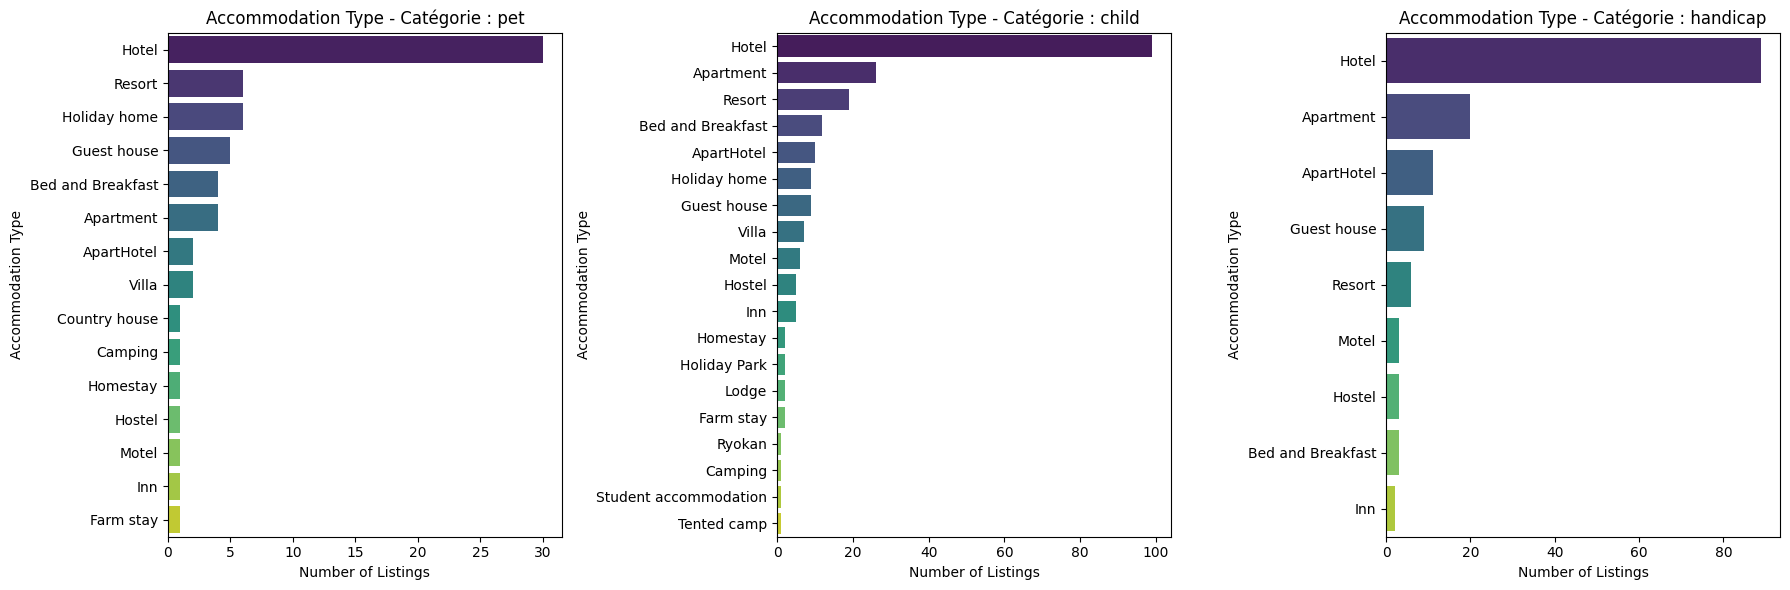

In [7]:
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))

for ax, cat in zip(axes, categories):
    df_cat = df_joined.filter(pl.col("category") == cat)
    
    counts = (
        df_cat
        .group_by("accommodation_type")
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
    )
    
    types = counts["accommodation_type"].to_list()
    values = counts["count"].to_list()
    
    palette = sns.color_palette("viridis", n_colors=len(types))
    
    sns.barplot(
        x=values,
        y=types,
        hue=types,
        palette=palette,
        legend=False,
        ax=ax
    )
    
    #ax.set_xscale("log")
    ax.set_title(f"Accommodation Type - Catégorie : {cat}")
    ax.set_xlabel("Number of Listings")
    ax.set_ylabel("Accommodation Type")

plt.tight_layout()
plt.show()

### Months

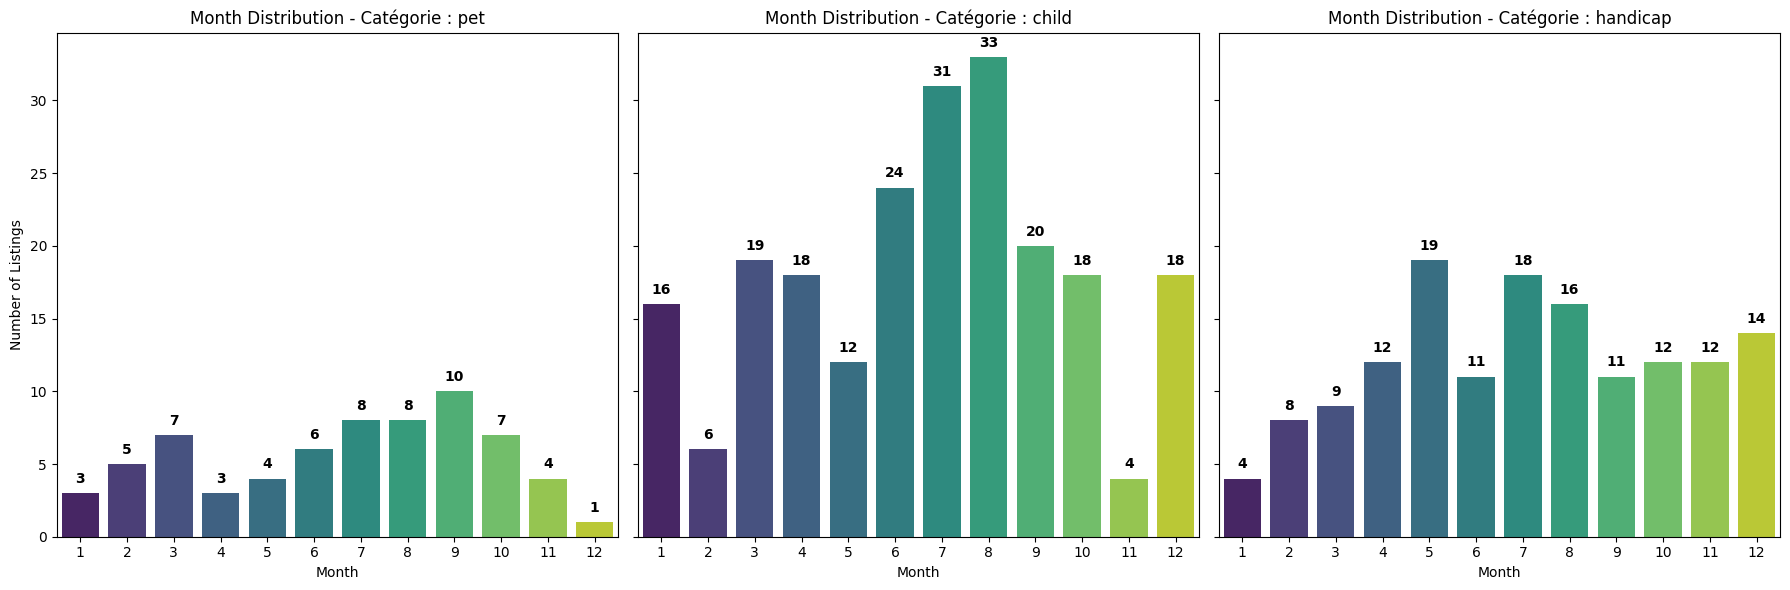

In [9]:
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6), sharey=True)

for ax, cat in zip(axes, categories):
    # Filtrer par catégorie
    df_cat = df_joined.filter(pl.col("category") == cat)
    
    # Comptage par mois
    counts = df_cat.group_by("month").agg(pl.len().alias("count")).sort("month")
    months = counts["month"].to_list()
    values = counts["count"].to_list()
    
    # Palette couleur
    palette = sns.color_palette("viridis", n_colors=len(months))
    
    # Barplot
    sns.barplot(
        x=months,
        y=values,
        hue=months,
        palette=palette,
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"Month Distribution - Catégorie : {cat}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Listings")
    
    # Ajouter les valeurs au-dessus des barres
    for i, v in enumerate(values):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Country

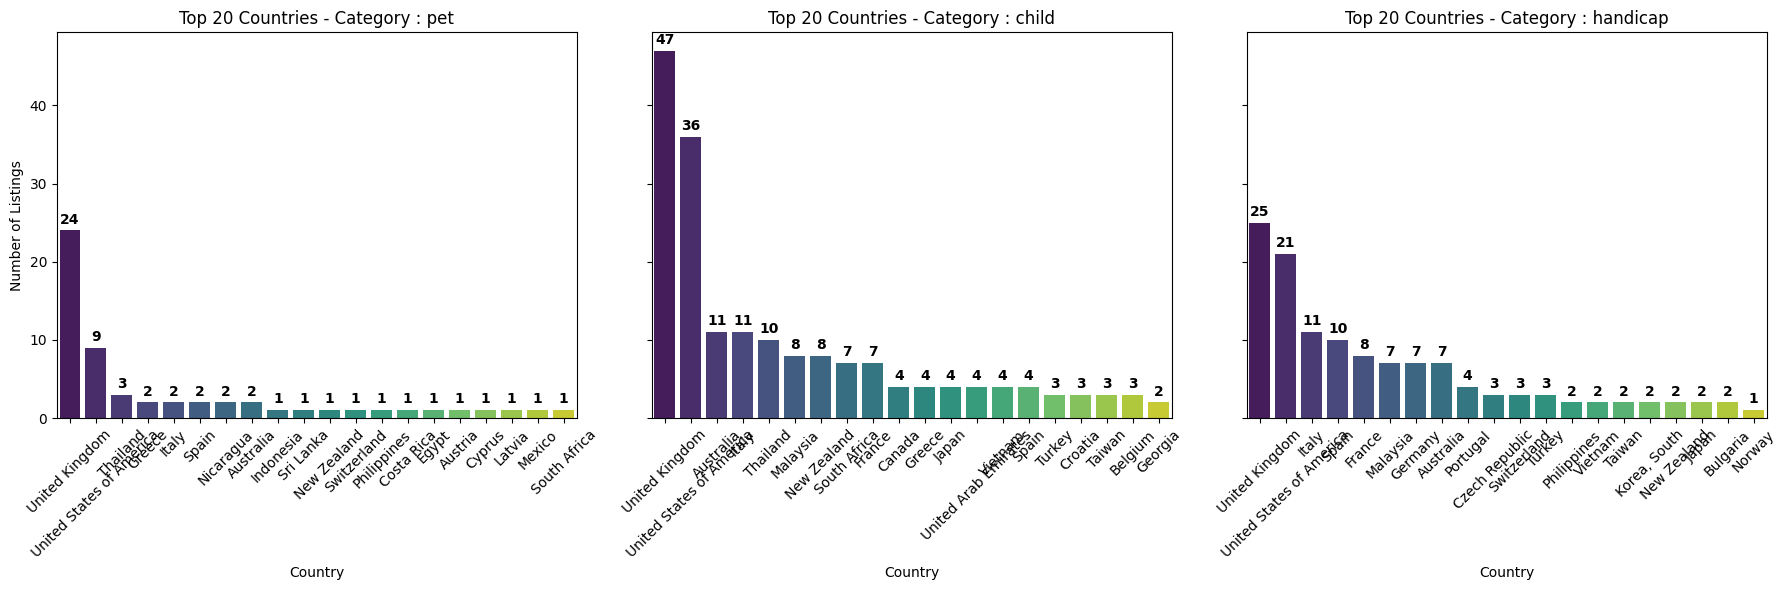

In [11]:
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6), sharey=True)

for ax, cat in zip(axes, categories):
    # Filtrer par catégorie
    df_cat = df_joined.filter(pl.col("category") == cat)
    
    # Comptage par pays
    counts = df_cat.group_by("accommodation_country").agg(pl.len().alias("count")).sort("count", descending=True)
    
    # Top 20
    top20 = counts.head(20)
    countries = top20["accommodation_country"].to_list()
    values = top20["count"].to_list()
    
    # Palette couleur
    palette = sns.color_palette("viridis", n_colors=len(countries))
    
    # Barplot
    sns.barplot(
        x=countries,
        y=values,
        hue=countries,
        palette=palette,
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"Top 20 Countries - Category : {cat}")
    ax.set_xlabel("Country")
    ax.set_ylabel("Number of Listings")
    ax.tick_params(axis='x', rotation=45)
    
    # Ajouter les valeurs au-dessus des barres
    for i, v in enumerate(values):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Hotel 1

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv("../../data/original/dataset/data_hotel_reviews_1.csv")
keys = pl.read_csv("../../data/processed/key_words_data_hotel_reviews_1.csv")

df_joined = df.join(keys, on="id", how="inner")

# Récupérer toutes les catégories uniques
categories = df_joined["category"].unique().to_list()


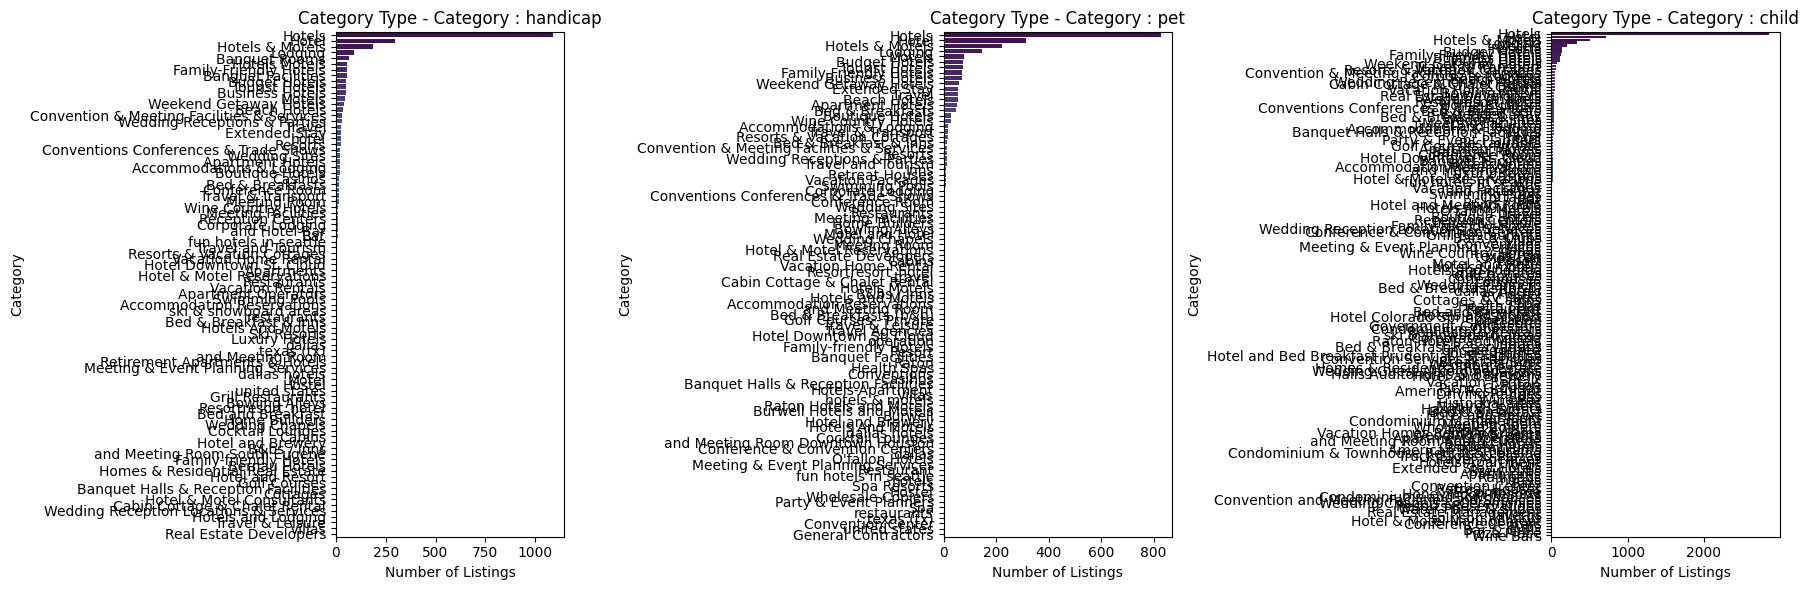

In [6]:
df_expanded = (
    df_joined
    .with_columns(
        pl.col("categories")
        .str.split(",")                      # 1) split en liste
        .alias("categories_split")
    )
    .explode("categories_split")             # 2) explode → string
    .with_columns(
        pl.col("categories_split")
        .str.strip_chars()                   # 3) strip correct en polars
        .alias("categories_clean")
    )
)

# Ensuite tu fais les graphes sur 'categories_clean'
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))

for ax, cat in zip(axes, categories):

    df_cat = df_expanded.filter(pl.col("category") == cat)

    counts = (
        df_cat
        .group_by("categories_clean")
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
    )

    types = counts["categories_clean"].to_list()
    values = counts["count"].to_list()

    palette = sns.color_palette("viridis", n_colors=len(types))

    sns.barplot(
        x=values,
        y=types,
        hue=types,
        palette=palette,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Category Type - Category : {cat}")
    ax.set_xlabel("Number of Listings")
    ax.set_ylabel("Category")

plt.tight_layout()
plt.show()


C:\Users\emma\AppData\Local\Temp\ipykernel_21676\1688418538.py:28: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))
C:\Users\emma\AppData\Local\Temp\ipykernel_21676\1688418538.py:28: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))
C:\Users\emma\AppData\Local\Temp\ipykernel_21676\1688418538.py:28: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


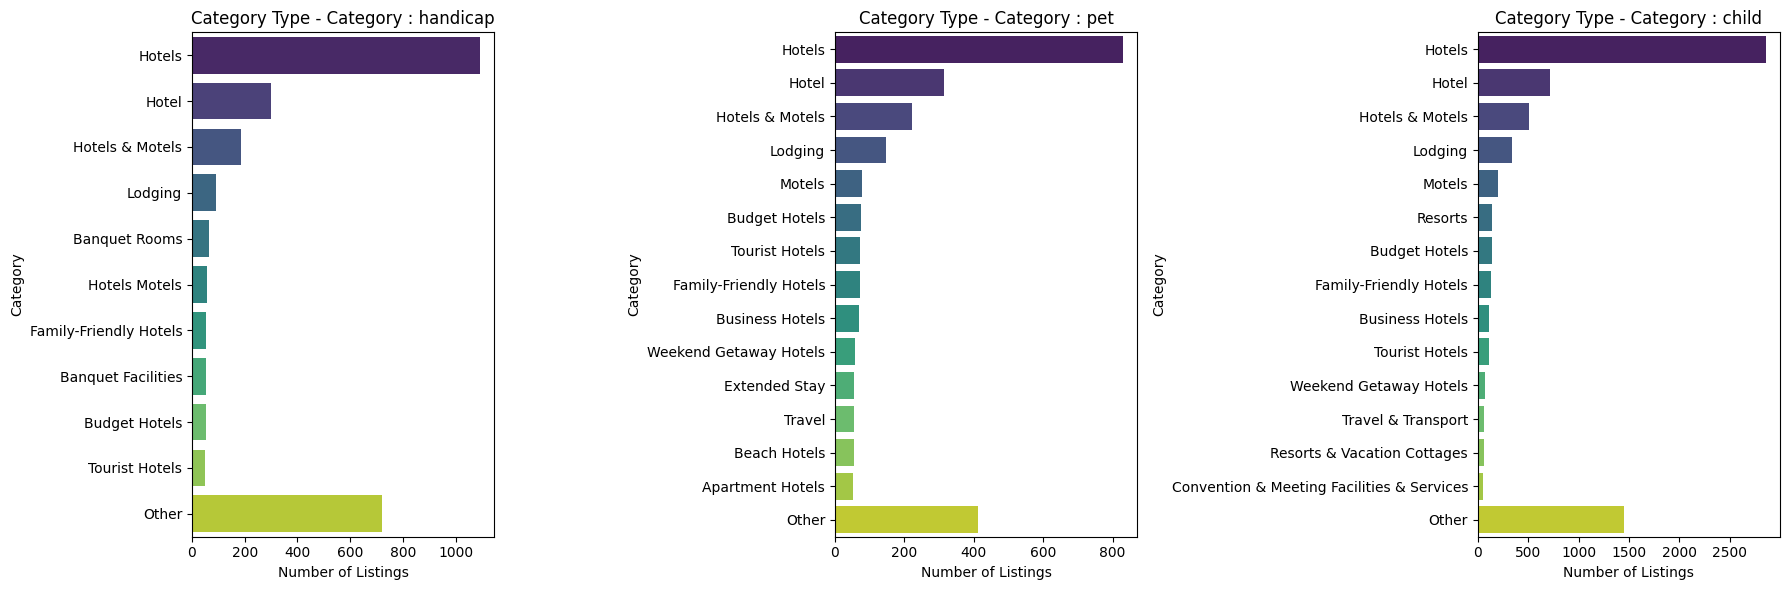

In [15]:
df_expanded = (
    df_joined
    .with_columns(
        pl.col("categories")
        .str.split(",")                      # 1) split en liste
        .alias("categories_split")
    )
    .explode("categories_split")             # 2) explode → string
    .with_columns(
        pl.col("categories_split")
        .str.strip_chars()                    # 3) strip correct en polars
        .alias("categories_clean")
    )
)

# Graphes pour chaque catégorie principale
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))

for ax, cat in zip(axes, categories):

    # Filtrer les lignes correspondant à la catégorie principale
    df_cat = df_expanded.filter(pl.col("category") == cat)

    # Comptage des sous-catégories
    counts = (
        df_cat
        .group_by("categories_clean")
        .agg(pl.count().alias("count"))
        .sort("count", descending=True)
    )

    # Regrouper les catégories rares (<5) dans "Other"
    rare_counts = counts.filter(pl.col("count") < 50)
    other_count = rare_counts["count"].sum()
    frequent_counts = counts.filter(pl.col("count") >= 50)

    if other_count > 0:
        frequent_counts = pl.concat([
            frequent_counts,
            pl.DataFrame({
                "categories_clean": ["Other"],
                "count": [other_count]
            }).with_columns(
                pl.col("count").cast(pl.UInt32)
            )
        ])

    # Préparer les données pour Seaborn
    types = frequent_counts["categories_clean"].to_list()
    values = frequent_counts["count"].to_list()

    palette = sns.color_palette("viridis", n_colors=len(types))

    sns.barplot(
        x=values,
        y=types,
        hue=types,
        palette=palette,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Category Type - Category : {cat}")
    ax.set_xlabel("Number of Listings")
    ax.set_ylabel("Category")

plt.tight_layout()
plt.show()